# Application the equivalent layer technique for estimating the magnetization direction: Montes Claros complex of GAP

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'Montes_Claros_EQL_magdirection_calculation.ipynb'

#### Importing auxiliary functions

In [4]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [5]:
import auxiliary_functions as fc

#### Loading data

In [6]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

#### Open a dictionary

In [7]:
result_mclaros = dict()

### Saving files

In [8]:
saved_files = []

### airborne survey information

In [9]:
print 'Shape : (%.0f,%.0f)'% data['shape'] 
print 'Number of data: %.1f' % data['N']
print 'dx: %.1f m' % data['dx']
print 'dy: %.1f m ' % data['dy']

Shape : (55,32)
Number of data: 1787.0
dx: -319.8 m
dy: 471.0 m 


## Properties of the model

### Main field

In [10]:
inc_gf,dec_gf = data['main_field']

In [11]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: -19.5 degree
Main field declination: -18.5 degree


## Generating the layer with my function 

In [12]:
h = 800.

#### Generating a layer

In [13]:
xs = data['x']
ys = data['y']
zs = h*np.ones_like(xs)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [14]:
i_pos = 1500

In [15]:
it_max = 30

In [16]:
it_marq = 15

In [17]:
lamb = 10.
dlamb = 100.

In [18]:
eps_e = 1e-4
eps_i = 1e-4

In [19]:
mu_list = [1e2,1e3,1e4,5*1e4,1e5,1e6]

In [20]:
mu_norm = []
norm_r = []
norm_m = []
m_est = []
incl_est = []
decl_est = []
phi_list = []
for i in mu_list:
    m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.levenberg_marquardt_NNLS(
        data['tfa_40'],data['x'],data['y'],
        data['z'],xs,ys,zs,inc_gf,dec_gf,-70.,50.,lamb,dlamb,i_pos,it_max,it_marq,eps_e,eps_i,i)
    G = fc.sensitivity_mag(data['x'],data['y'],data['z'],
                       xs,ys,zs,inc_gf,dec_gf,inc_est,dec_est)
    tfpred = np.dot(G,m_LM)
    r = data['tfa_40'] - tfpred 
    
    norm_r.append(np.sqrt(np.sum(r*r)))
    norm_m.append(np.sqrt(np.sum(m_LM*m_LM)))
    m_est.append(m_LM)
    incl_est.append(inc_est)
    decl_est.append(dec_est)
    phi_list.append(phi)

i = 0
-68.8226635994 47.3214115417
i = 1
-67.6806228865 45.1890011838
i = 2
-66.580439361 43.475086635
i = 3
-65.526729421 42.0871258039
i = 4
-64.5168202089 40.9542942484
i = 5
-63.5528522562 40.0287494296
i = 6
-62.6515231473 39.2651774315
i = 7
-61.81626211 38.6150766516
i = 8
-61.0327896518 38.0525211701
i = 9
-60.2951251459 37.5638546726
i = 10
-59.6003179651 37.1391091601
i = 11
-58.9464896379 36.7706762622
i = 12
-58.3311624756 36.4514012879
i = 13
-57.7514717282 36.1740463912
i = 14
-57.2053280842 35.9329717469
i = 15
-56.6905647676 35.7232204906
i = 16
-56.2049105038 35.5408331072
i = 17
-55.7463355211 35.3817971054
i = 18
-55.3130099536 35.2430346895
i = 19
-54.9033613064 35.1220498512
i = 20
-54.5150635189 35.0159962045
i = 21
-54.1467009492 34.923173813
i = 22
-53.7970432726 34.8420865322
i = 23
-53.4649629059 34.7712712631
i = 24
-53.1493599453 34.7094566726
i = 25
-52.8491581344 34.6557025028
i = 26
-52.5635136176 34.6090912905
i = 27
-52.2915307213 34.5687975594
i = 28
-

-52.345633738 34.5045056389
i = 29
-52.1027240691 34.4698315434
i = 30
-51.8712781029 34.4395627895
i = 31
-51.6497138272 34.4148225267
i = 32
-51.437478064 34.3950253135
i = 33
-51.2344481782 34.3797068434
i = 34
-51.0402212265 34.3683658983
i = 35
-50.854346448 34.3605271465
i = 36
-50.6763819992 34.3557499201
i = 37
-50.5058942817 34.353606877
i = 38
-50.3424833611 34.3537259544
i = 39
-50.185795319 34.3558269953
i = 40
-50.0355001048 34.3596542998
i = 41
-49.8912877572 34.3649755362
i = 42
-49.7529009701 34.3715855893
i = 43
-49.6200907226 34.3793163368
i = 44
-49.4925917102 34.3879911519
i = 45
-49.3701516326 34.3974616735
i = 46
-49.2526423218 34.4076598465
i = 47
-49.1398349307 34.4184628054
i = 48
-49.0315114581 34.4297593673
i = 49
-49.0315114581 34.4297593673
i = 0
-70.1037296243 47.4240091466
i = 1
-70.1644461879 45.0741572715
i = 2
-70.1912232555 42.9410633069
i = 3
-70.1912682745 41.0145294225
i = 4
-70.1698538676 39.2815240673
i = 5
-70.1329773053 37.7252809516
i = 6
-70.

## L-curve visualization

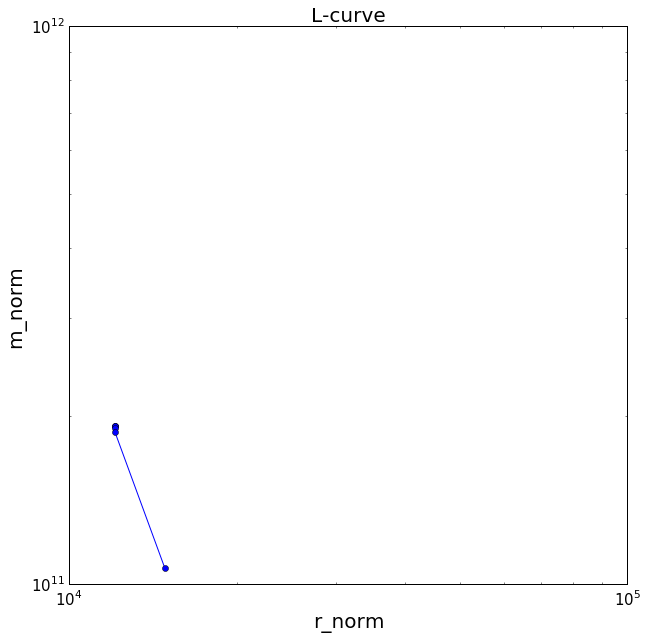

In [21]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.loglog(norm_r,norm_m, 'b-')
plt.loglog(norm_r,norm_m, 'bo')
plt.title('L-curve', fontsize=title_font)
plt.xlabel('r_norm', fontsize = title_font)
plt.ylabel('m_norm', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/Lcurve_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Results

In [22]:
result_mclaros['magnetic_moment'] = m_est
result_mclaros['inc_est'] = incl_est
result_mclaros['dec_est'] = decl_est
result_mclaros['layer_depth'] = h
result_mclaros['reg_parameter'] = mu_list
result_mclaros['phi'] = phi_list

### Generating .pickle file

In [23]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_mclaros['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [24]:
file_name = 'data/result_mclaros.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_mclaros, f)
    
saved_files.append(file_name)

### Saved files

In [25]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/Lcurve_RM.png
2  figs/Lcurve_RM.eps
3  data/result_mclaros.pickle
